# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [1]:
from scipy.stats import binom

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [2]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


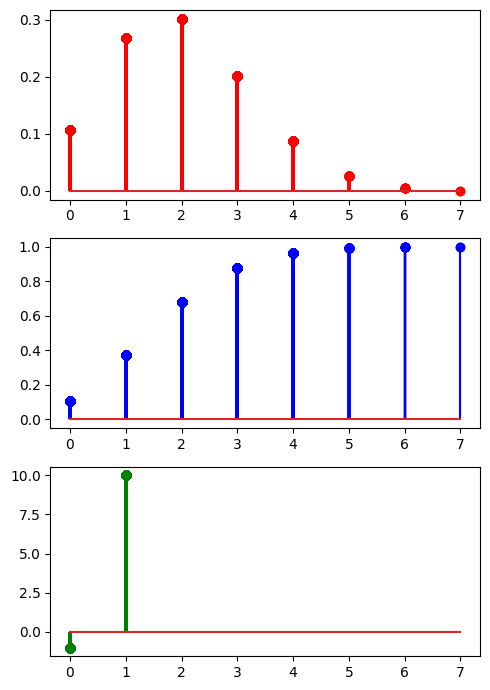

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

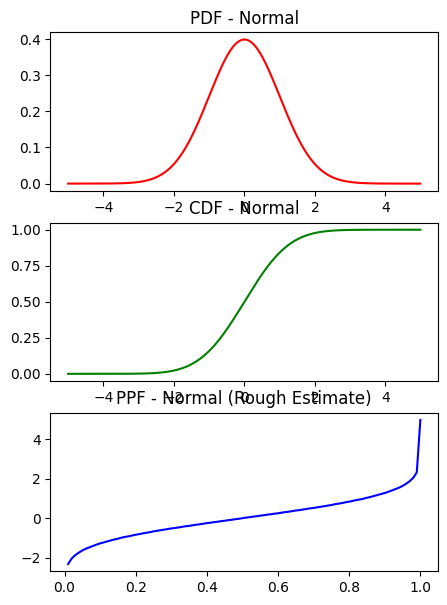

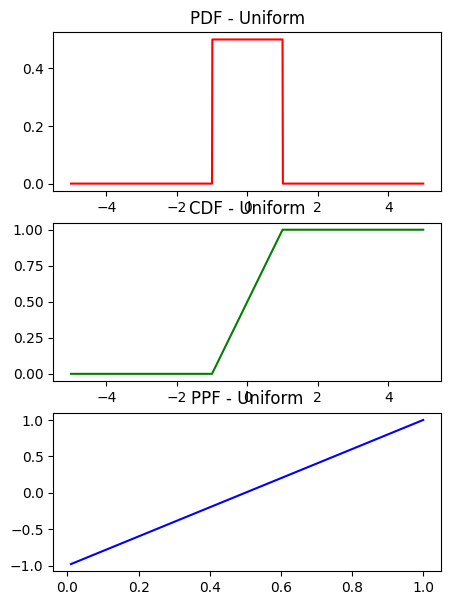

In [11]:
# from scipy.stats import norm, uniform
# import numpy as np
# import matplotlib.pyplot as plt

# normal_f = []
# uniform_f = []
# funcs = ['pdf', 'cdf', 'ppf']
# colors = ['r-', 'b-', 'g-']
# for i in funcs:
#     normal_f.append(getattr(norm, i))
#     uniform_f.append(getattr(uniform, i))
# mean, low, std, high = 0, 0, 1, 1

# data = np.arange(-5, 5, 0.1)

# fig, axis = plt.subplots(3, 1, figsize = (5, 7))

# for i in range(len(normal_f)):
#     axis[i].plot(data, normal_f[i](data, loc = mean, scale = std), colors[i])
# plt.tight_layout()
# plt.show()

# fig, axis = plt.subplots(3, 1, figsize = (5, 7))

# for i in range(len(uniform_f)):
#     axis[i].plot(data, uniform_f[i](data, loc = low, scale = high))
# plt.tight_layout()
# plt.show()


import numpy as np
import matplotlib.pyplot as plt
from math import e, sqrt, pi, erf


class Normal:
    x = np.arange(-5, 5, 0.01)
    mean = 0
    std = 1

    def __init__(self):
        fig, axis = plt.subplots(3,1,figsize=(5,7))
        axis[0].plot(self.x, self.pdf(), 'r-')
        axis[1].plot(self.x, self.cdf(), 'g-')
        axis[2].plot(self.x, self.ppf(), 'b-')
        axis[0].set_title('PDF - Normal')
        axis[1].set_title('CDF - Normal')
        axis[2].set_title('PPF - Normal (Rough Estimate)')
        plt.show()
        return

    def pdf(self):
        result = [(1/(self.std*sqrt(2*pi)))*(e**((-1/2)*((i - self.mean)/self.std)**2)) for i in self.x]
        return result

    def cdf(self):
        result = [(1 + erf(i/sqrt(2)))/2 for i in self.x]
        return result

    def ppf(self):
        result = []
        for i in range(len(self.x)):
            if self.x[i] < 0 or self.x[i] > 1:
                result.append(np.nan)
            else:
                result.append(self.x[self.cdf().index(min(self.cdf(), key=lambda x:abs(x-self.x[i])))])
        return result

class Uniform:
    x = np.arange(-5,5,0.01)
    low = -1
    scale = 2

    def __init__(self):
        fig, axis = plt.subplots(3,1,figsize=(5,7))
        axis[0].plot(self.x, self.pdf(), 'r-')
        axis[1].plot(self.x, self.cdf(), 'g-')
        axis[2].plot(self.x, self.ppf(), 'b-')
        axis[0].set_title('PDF - Uniform')
        axis[1].set_title('CDF - Uniform')
        axis[2].set_title('PPF - Uniform')
        plt.show()

    def pdf(self):
        result = [0 if i < self.low or i > self.low+self.scale else 1/2 for i in self.x]
        return result

    def cdf(self):
        result = [0 if i < self.low else 1 if i > self.low+self.scale else (i-self.low)/self.scale for i in self.x]
        return result

    def ppf(self):
        result = []
        for i in range(len(self.x)):
            if self.x[i] < 0 or self.x[i] > 1:
                result.append(np.nan)
            else:
                result.append(self.x[self.cdf().index(min(self.cdf(), key= lambda x:abs(x-self.x[i]) if not np.isnan(x) else 999))])
        return result

Normal()
Uniform()